# Car Price US

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

## Objective

It is required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [664]:
#importing all the necaesary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import math

In [665]:
#managing the view of output in jupyter notebook
%matplotlib inline
warnings.filterwarnings('ignore')#ignoring the display of warnings
#pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
sns.set(style='whitegrid')

In [666]:
car = pd.read_csv('CarPrice_Assignment.csv')#importing the dataset for analysis
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Preparation and EDA

In [667]:
car.shape

(205, 26)

In [668]:
car.info()#collecting info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no null values in the dataframe

### Data correction and Encoding 

In [669]:
#car.CarName.unique()

In [670]:
#Updating the variable CarName
car.CarName = car.CarName.apply(lambda x:x.split()[0].lower())#Extracting the company name

In [671]:
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [672]:
#Removing duplicates, abbreviated and mispelled names
car.CarName = car.CarName.replace(['vw','vokswagen'],'volkswagen')
car.CarName = car.CarName.replace('porcshce','porsche')
car.CarName = car.CarName.replace('alfa-romero','alfa-romeo')
car.CarName = car.CarName.replace('maxda','mazda')
car.CarName = car.CarName.replace('toyouta','toyota')

In [673]:
car.CarName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

All the car names are unique and no value is repeating

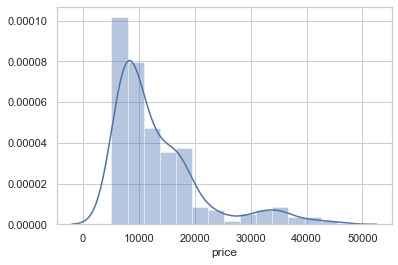

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [674]:
sns.distplot(car.price)
plt.show()
print(car.price.describe())

Most of the car price are in the lower price range. Data is right skewed. 

In [675]:
def category(var,fig=(25,14)):
    plt.figure(figsize=fig)
    plt.subplot(2,2,1)
    car[var].value_counts().plot.bar()
    plt.title(var+'Count')
    plt.subplot(2,2,2)
    car.groupby(var).price.mean().plot.bar()
    plt.title('Average Price')
    plt.subplot(2,2,3)
    sns.boxplot(y=car['price'].apply(lambda x:math.log(x)),x=car[var])
    plt.tight_layout()
    plt.show()

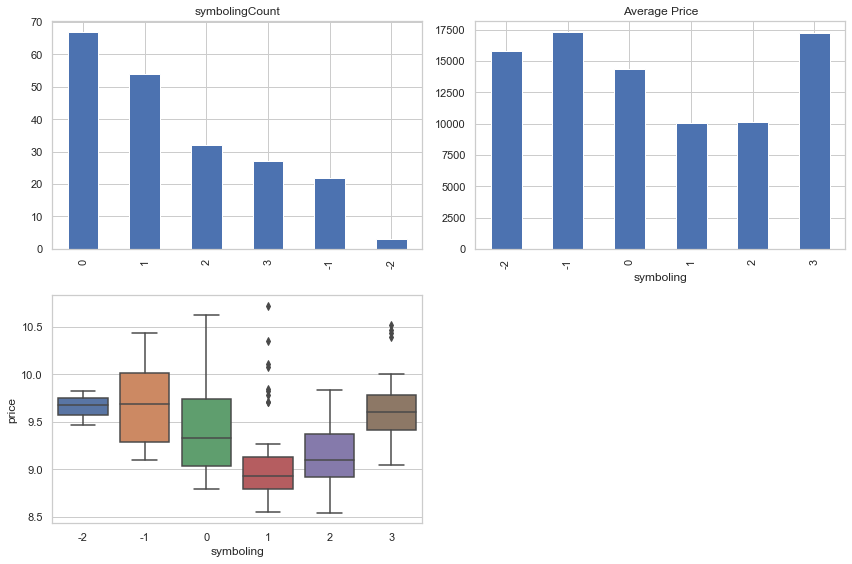

In [676]:
category('symboling',(12,8))

 - Most of the cars has 0 symboling. There migt be a decrease in average price with symboling except the value 3

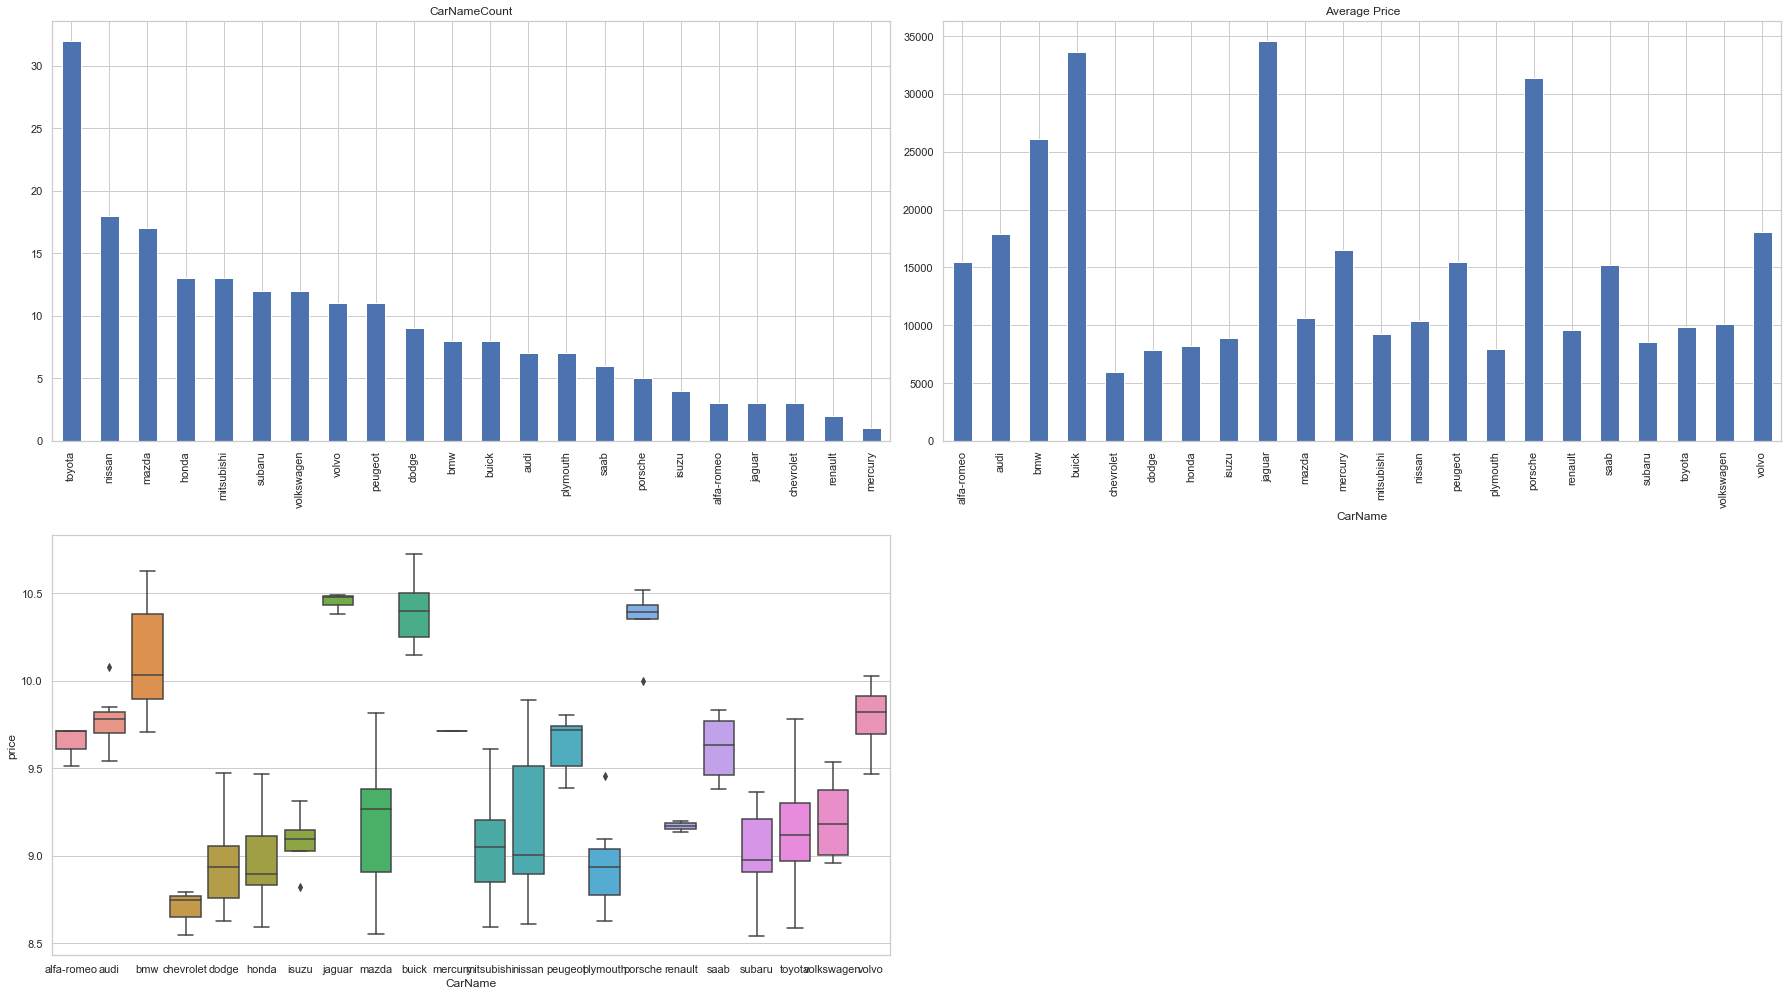

In [677]:
category('CarName')

- Most of the cars is of Japanese companies 
- Most highly priced cars is of Jaguar, buick and porsche

We can group these car companies country/continent wise
Assumption : For sake of simplicity conisdering UK in EU

In [678]:
#Removing duplicates, abbreviated and mispelled names
car.CarName = car.CarName.replace(['honda','isuzu','mazda','mitsubishi','nissan','subaru', 'toyota'],'JP')
car.CarName = car.CarName.replace(['chevrolet', 'dodge','buick', 'mercury','plymouth'],'US')
car.CarName = car.CarName.replace(['alfa-romeo','audi', 'bmw','jaguar','peugeot','porsche','renault','saab','volkswagen', 'volvo'],'EU')

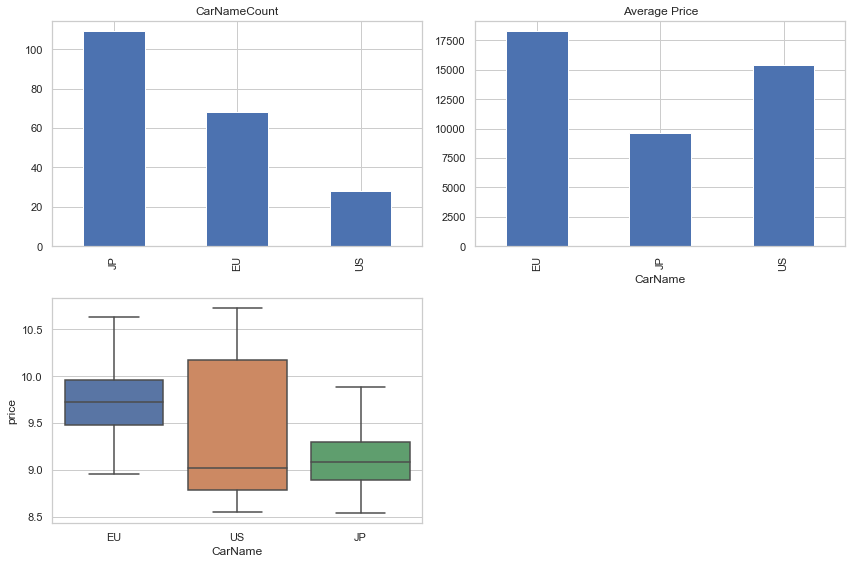

In [679]:
category('CarName',(12,8))

- European Cars are highest average price and Japanase has the lowest which might be the reason for high sale of japanese cars

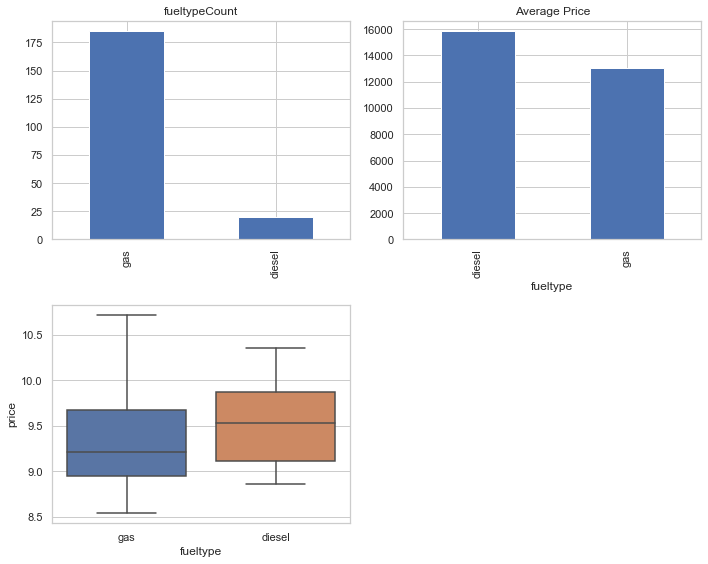

In [680]:
category('fueltype',(10,8))

- No of gasoline cars is larger compared to diesel cars but the price of diesel cars is higher. 

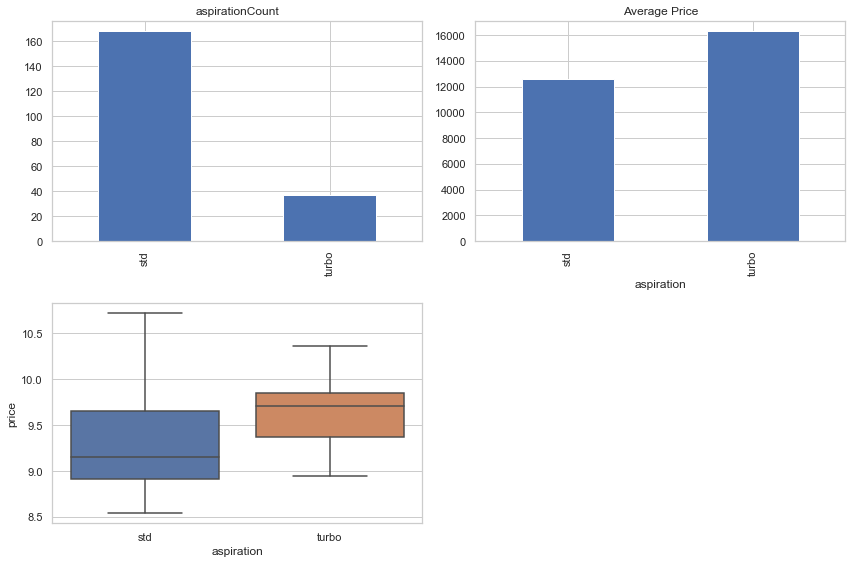

In [681]:
category('aspiration',(12,8))

- Price of turbo is high but the no of std is high

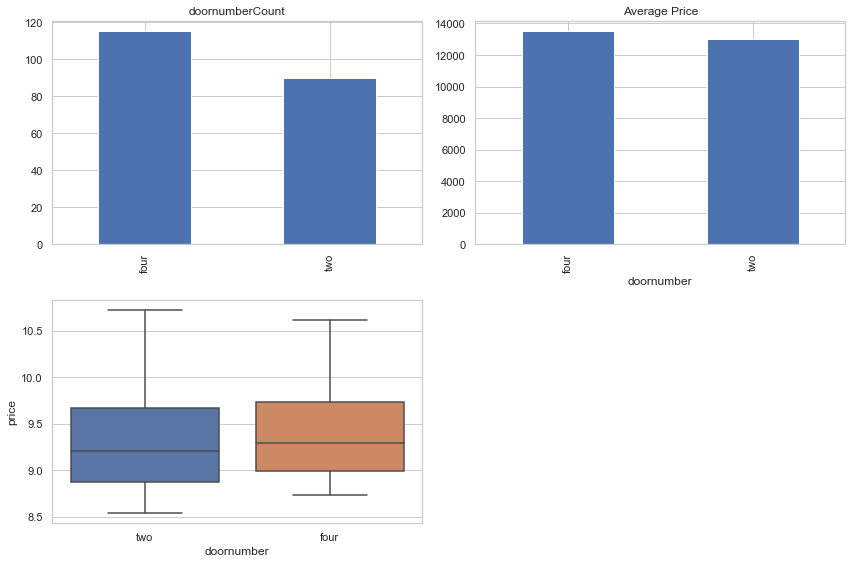

In [682]:
category('doornumber',(12,8))

- No of doors does not impact the price that much

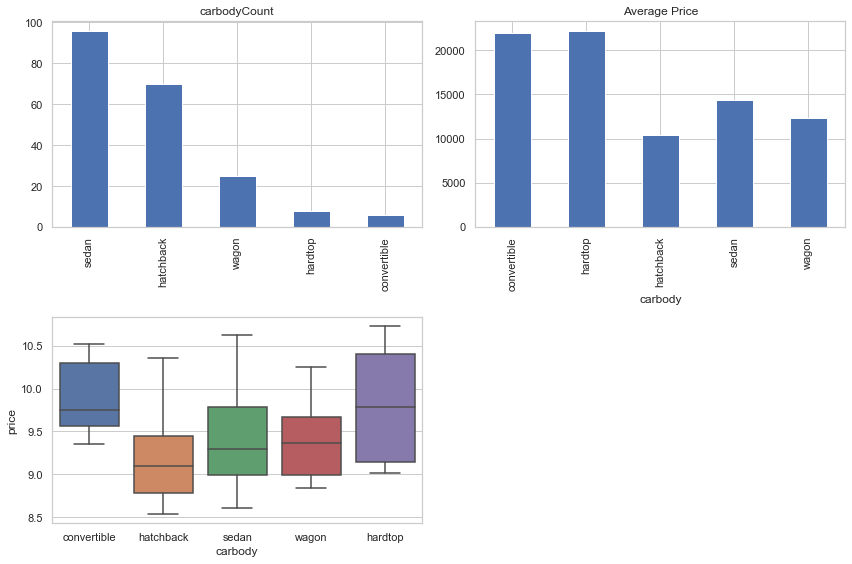

In [683]:
category('carbody',(12,8))

- Most no of cars bought are Sedan
- Higher range price is of hardtop and convertible
- Hatchback and wagon are the cheapest

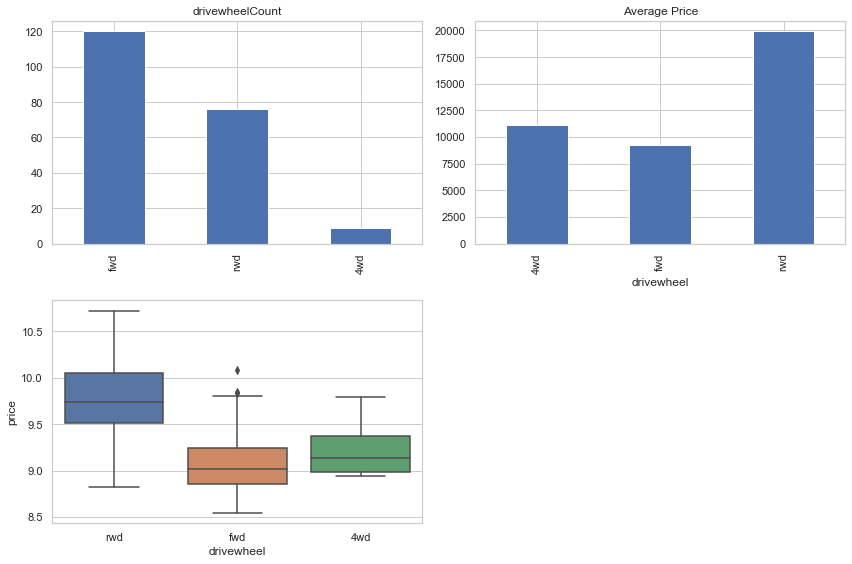

In [684]:
category('drivewheel',(12,8))

- Rear wheel drive has the highest price. 4 wheel drive has avery few nos.

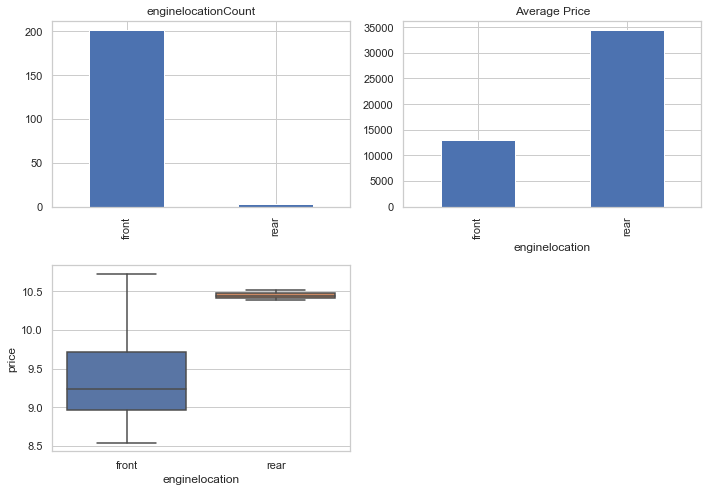

In [685]:
category('enginelocation',(10,7))

- Rear side engine has very higher price compare to the front side.

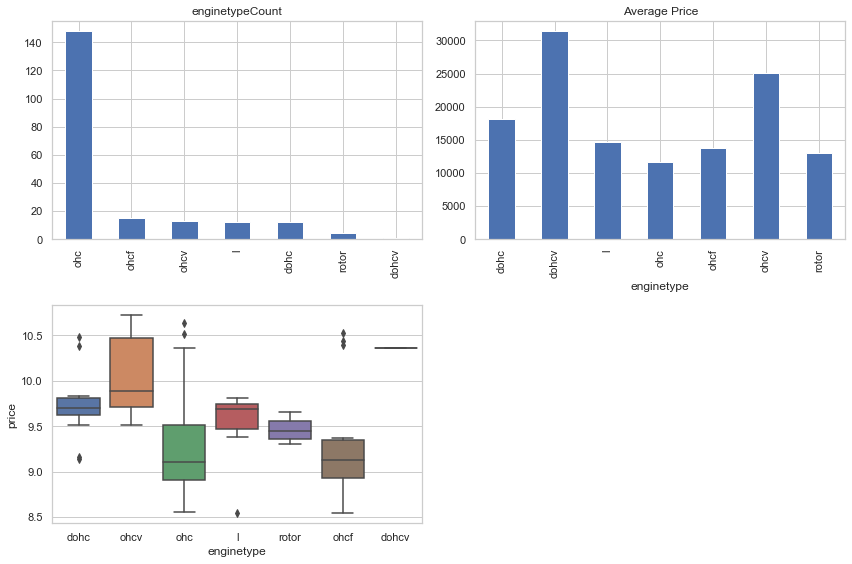

In [686]:
category('enginetype',(12,8))

- ohc is most in nos. 
- ohcv has the highest average price because dohcv has very less entry

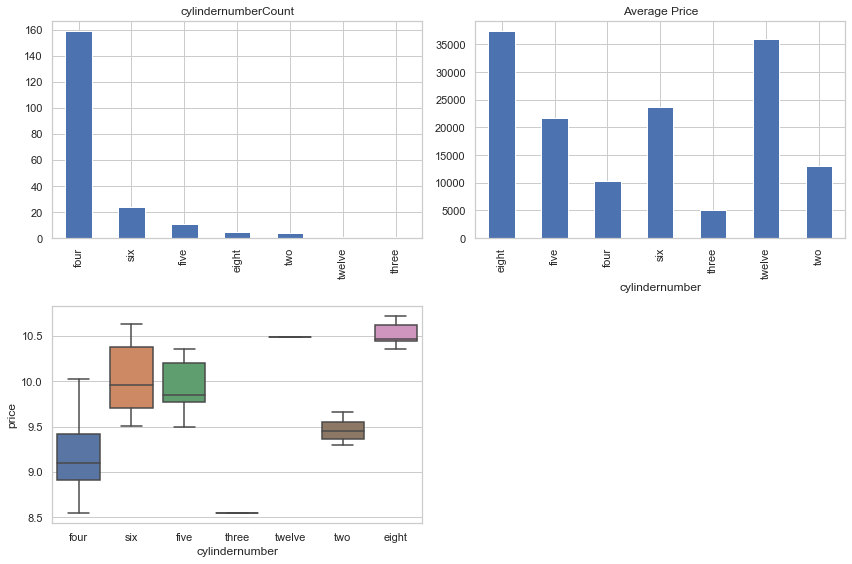

In [687]:
category('cylindernumber',(12,8))

- Most of the vehicles has 4 cylinders
- Price increase with no of cylinders except the case of two cylinders

In [688]:
#mpfi and mfi has same meaning multiple fuel injection system
#spfi and spdi are single direct fuel injection system
car.fuelsystem = car.fuelsystem.replace('mfi','mpfi')
car.fuelsystem = car.fuelsystem.replace('spfi','spdi')

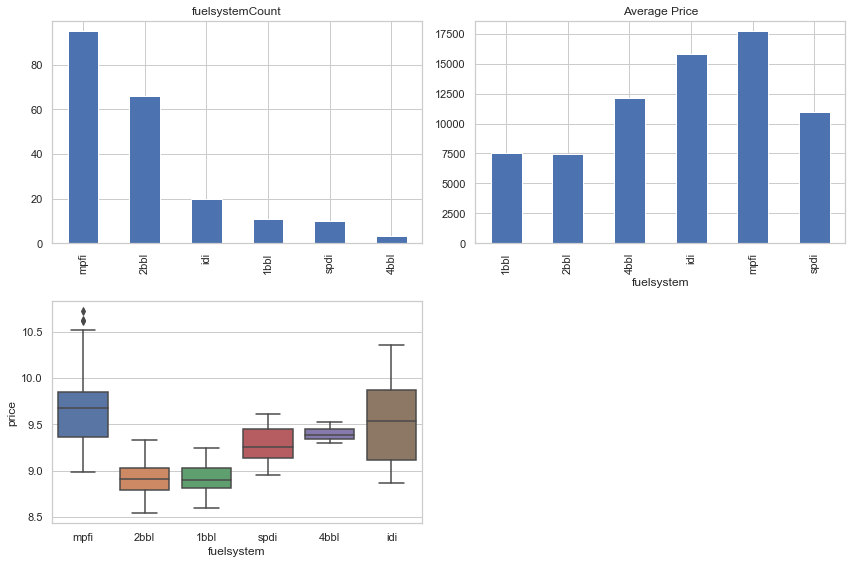

In [689]:
category('fuelsystem',(12,8))

- mpfi has the highest count and the highest average price 

In [690]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,EU,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,EU,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,EU,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,EU,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,EU,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [691]:
#Encoding the variables
car.fueltype = car.fueltype.map({'gas':0,'diesel':1})
car.aspiration = car.aspiration.map({'std':0,'turbo':1})
car.doornumber = car.doornumber.map({'two':2,'four':4})
car.enginelocation = car.enginelocation.map({'front':0,'rear':1})
#car.cylindernumber = car.cylindernumber.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

### Analyzing the numerical variables 

In [692]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

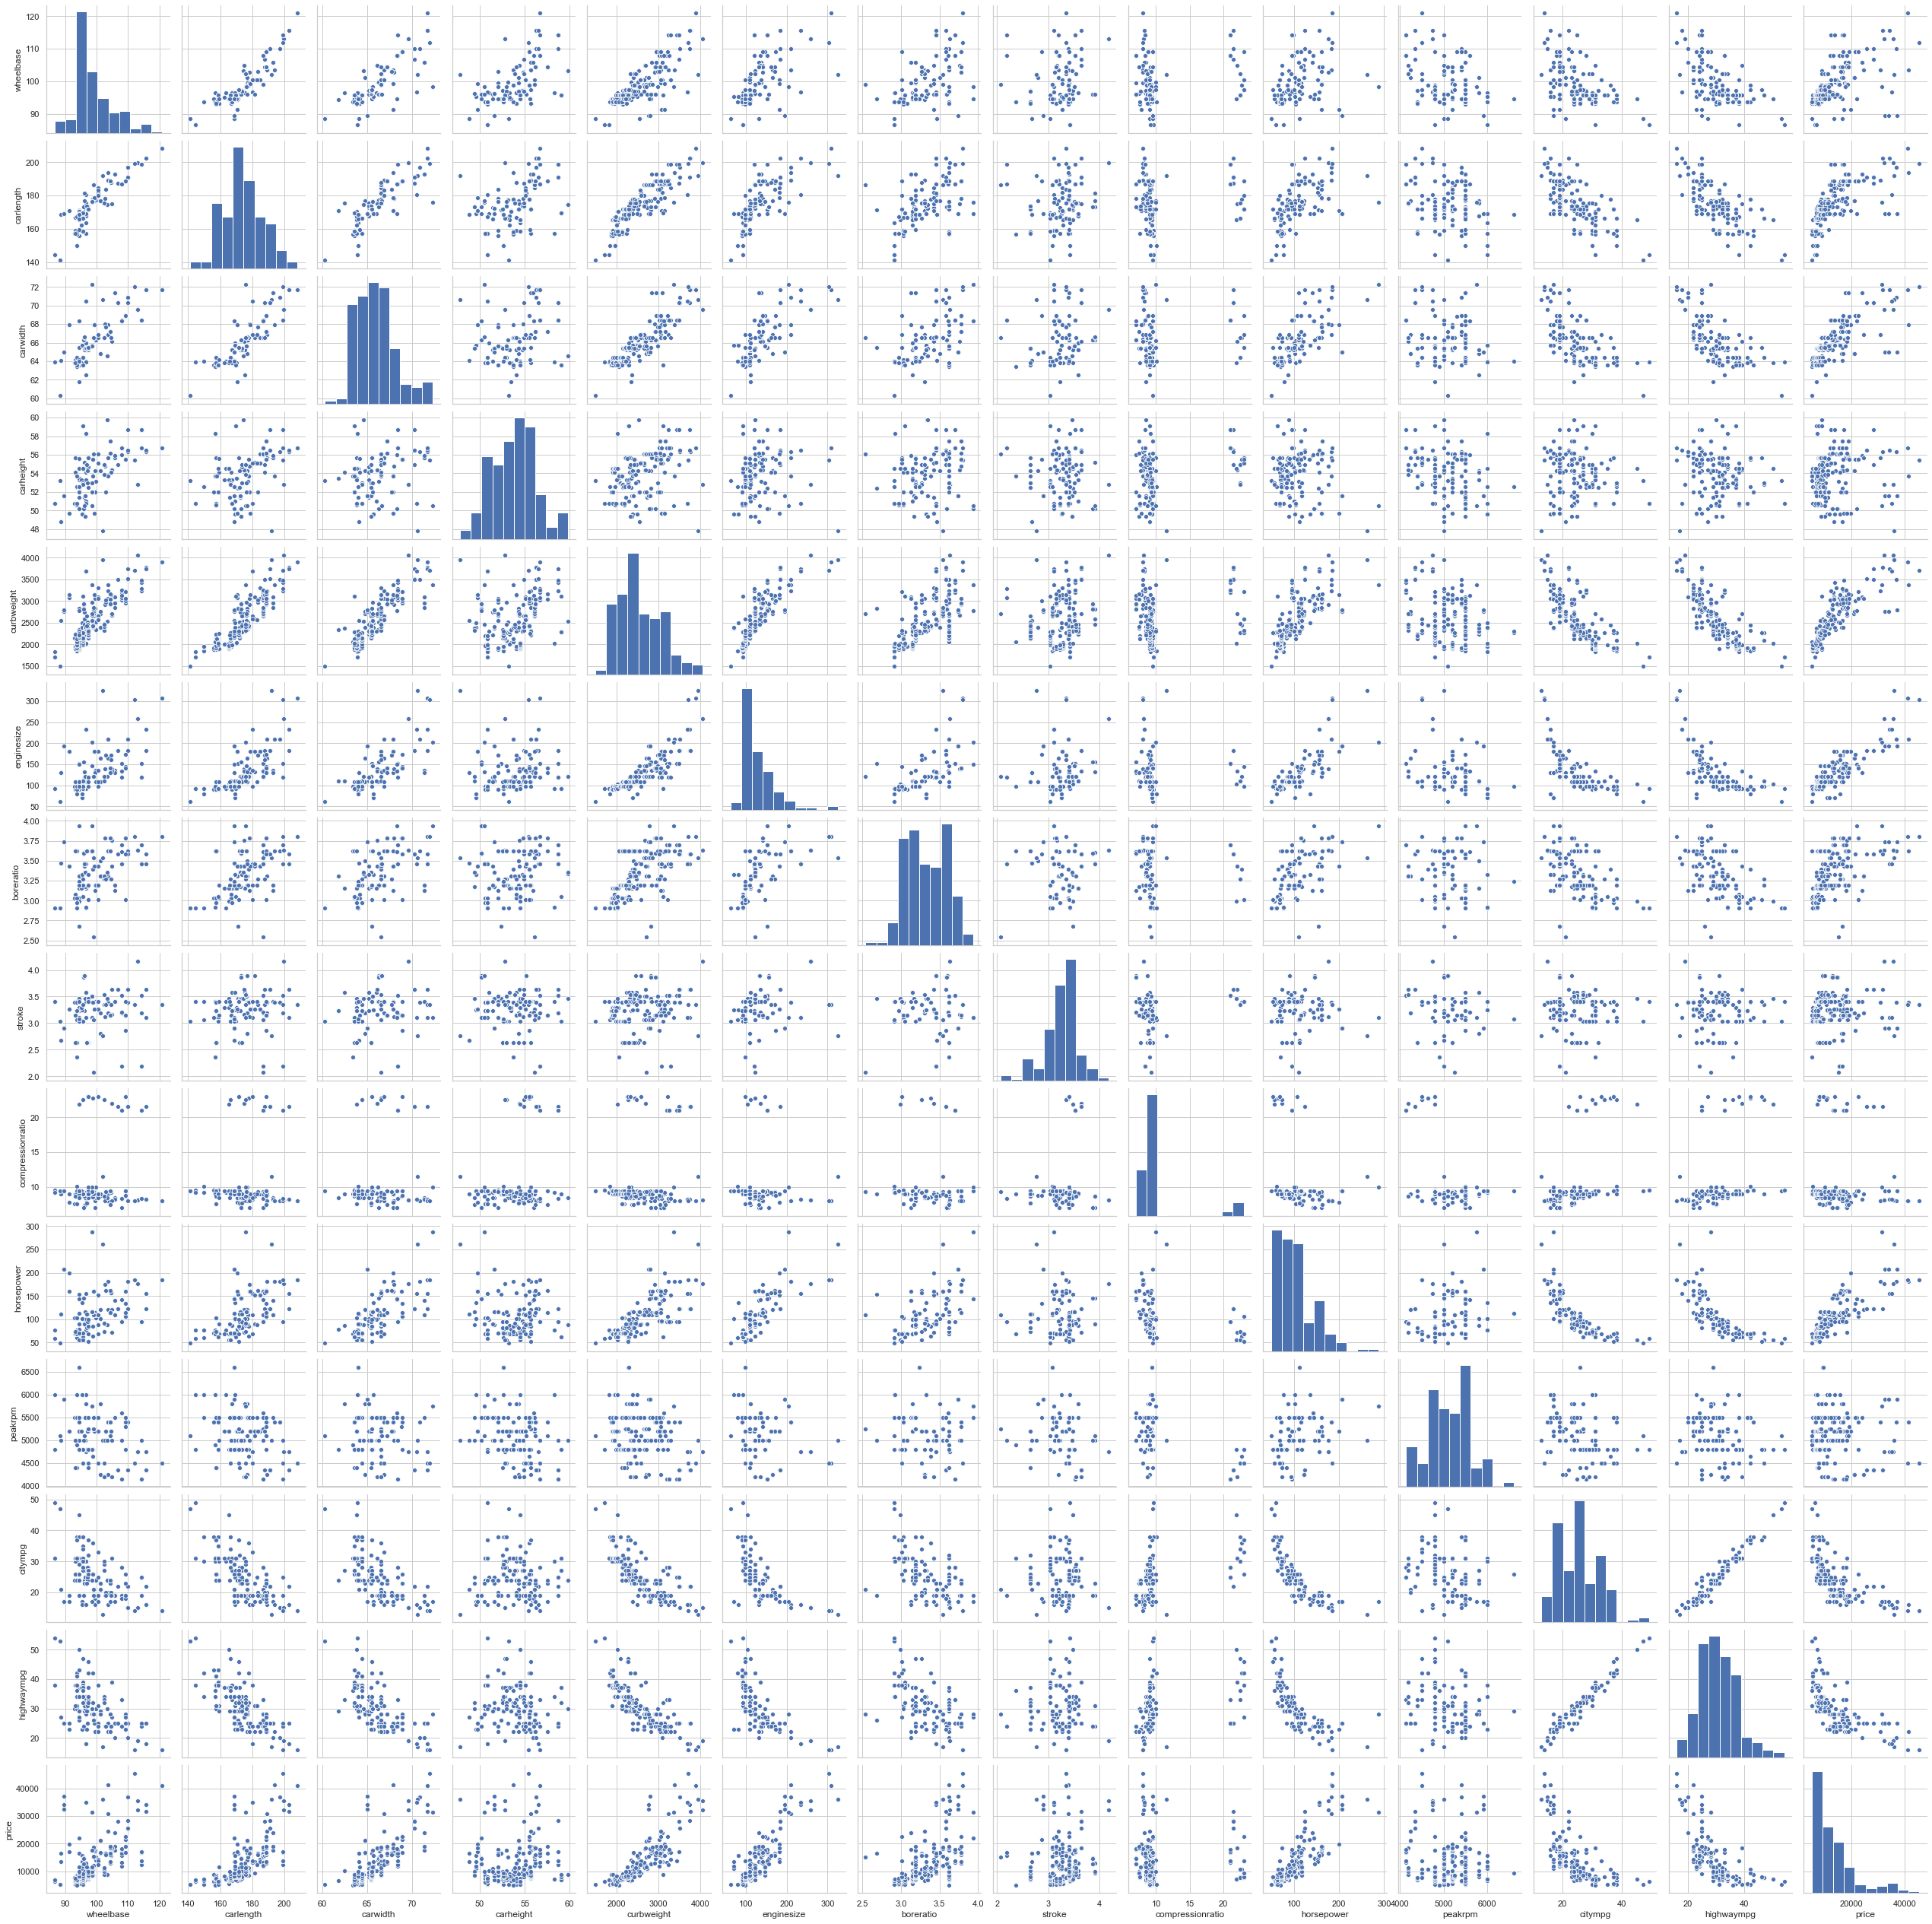

In [693]:
plt.figure(figsize=(20,20))
sns.pairplot(car[[ 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke',
    'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']])

- wheelbase, carlength, carwidth, curbweight, engine size, boreratio is positively corelated with price and a pattern can be observed
- Similarly, citympg and highwaymps is negatively corelated with the price.
- carheight, stroke, compressionratio and peakrpm doesnot shows any pattern of relationship with price  

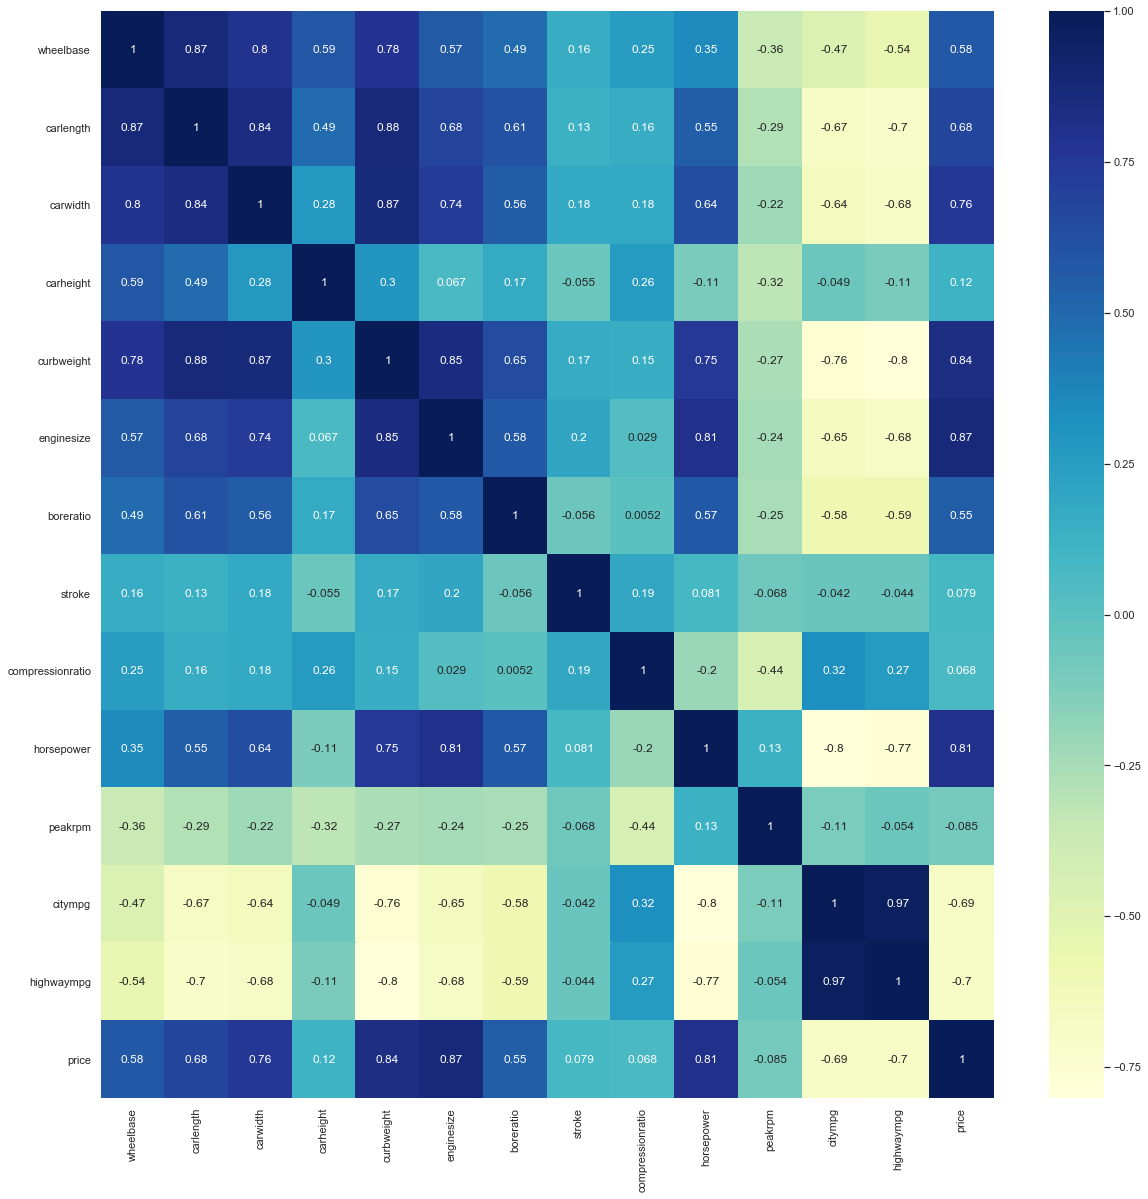

In [694]:
plt.figure(figsize=(20,20))
sns.heatmap(car[[ 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke',
    'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']].corr(),annot=True,cmap="YlGnBu")

In [695]:
#citympg and highwaympg is highly corealated so we will used a derived variable.
car['avgmpg']=(car.citympg+car.highwaympg)/2

In [696]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'avgmpg'],
      dtype='object')

## Impotant features for modeling after EDA are:
- symboling,CarName,fueltype,aspiration, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, curbweight,enginetype, cylindernumber, enginesize, fuelsystem, boreratio, horsepower, avgmpg

In [706]:
#creating dataframe for modelling
df=car[['symboling', 'CarName', 'fueltype', 'aspiration','carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength','carwidth','curbweight', 'enginetype','cylindernumber','enginesize','boreratio',
        'horsepower','avgmpg','price']]

In [707]:
df.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,avgmpg,price
0,3,EU,0,0,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,24.0,13495.0
1,3,EU,0,0,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,24.0,16500.0
2,1,EU,0,0,hatchback,rwd,0,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,22.5,16500.0
3,2,EU,0,0,sedan,fwd,0,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,27.0,13950.0
4,2,EU,0,0,sedan,4wd,0,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,20.0,17450.0


### Creating dummy variable for remaining categorical variable: 

In [708]:
def dummy(var,df1):#Function to create dummy variables
    a=pd.get_dummies(df1[var],drop_first=True) 
    df1=pd.concat([df1,a],axis=1)
    df1.drop(var,axis=1,inplace=True)
    return df1

In [709]:
df=dummy('CarName',df)
df=dummy('carbody',df)
df=dummy('drivewheel',df)
df=dummy('enginetype',df)
#df=dummy('fuelsystem',df)
df=dummy('cylindernumber',df)

In [710]:
#Converting price to log for lesser and comparable beta values
df.price=df['price'].apply(lambda x:math.log(x))

In [711]:
df.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,avgmpg,price,JP,US,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,0,0,0,88.6,168.8,64.1,2548,130,3.47,111,24.0,9.510075,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,3,0,0,0,88.6,168.8,64.1,2548,130,3.47,111,24.0,9.711116,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,94.5,171.2,65.5,2823,152,2.68,154,22.5,9.711116,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,2,0,0,0,99.8,176.6,66.2,2337,109,3.19,102,27.0,9.543235,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2,0,0,0,99.4,176.6,66.4,2824,136,3.19,115,20.0,9.767095,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [712]:
df.shape

(205, 33)

## Linear Regression 

In [823]:
#Splitting the data frame into test and train
y=df['price']
x=df.drop('price',axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [824]:
#scaling the features of train dataset
scale = MinMaxScaler()
var = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','avgmpg']
X_train[var]=scale.fit_transform(X_train[var])
X_train.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,avgmpg,JP,US,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,1,0,0,0,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.534247,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,3,0,0,0,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.219178,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,1,0,0,0,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.342466,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,3,0,0,0,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.246575,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,-1,0,1,0,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.123288,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [825]:
X_train.shape

(143, 32)

#### There are 32 features so we will use Recurrsive feature elimination to find the most relevant features

In [826]:
#importing LR and RFE from scikitlearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [827]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)             # running RFE with considering top 10 features
rfe = rfe.fit(X_train, y_train)

In [828]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'JP', 'US',
       'dohcv', 'l', 'four', 'twelve'],
      dtype='object')

In [829]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 21),
 ('fueltype', False, 5),
 ('aspiration', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('avgmpg', False, 17),
 ('JP', True, 1),
 ('US', True, 1),
 ('hardtop', False, 10),
 ('hatchback', False, 7),
 ('sedan', False, 9),
 ('wagon', False, 8),
 ('fwd', False, 15),
 ('rwd', False, 20),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 14),
 ('ohcf', False, 19),
 ('ohcv', False, 22),
 ('rotor', False, 18),
 ('five', False, 2),
 ('four', True, 1),
 ('six', False, 3),
 ('three', False, 16),
 ('twelve', True, 1),
 ('two', False, 13)]

In [830]:
#Defining the function for statistical parameters like p values, coefficient, vif etc. 
def lin_reg(X_train,y_train):
    X_train_sm = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_sm).fit()
    print(lr.summary(),'\nVIF:')
    print(pd.Series([variance_inflation_factor(X_train_sm.values, i) 
               for i in range(X_train_sm.shape[1])], 
              index=X_train_sm.columns))

Step by step model preparation starting with 10 variables and removing features one by one on the basis of statistical parameters p value and VIF. 

In [831]:
X_train=X_train[['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'JP', 'US',
       'dohcv', 'l', 'four', 'twelve']]

### Model 1: 

In [832]:
lin_reg(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.12e-64
Time:                        17:47:50   Log-Likelihood:                 66.234
No. Observations:                 143   AIC:                            -110.5
Df Residuals:                     132   BIC:                            -77.88
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.7836      0.081    107.

- This model fits 90.3% as per the Adj. R-squared.
- There are many features with high p value>0.05 and VIF>5. They will be eliminated one by one
- dohcv will be removed because of the highest p value

### Model 2:

In [833]:
X_train.drop('dohcv',axis=1,inplace=True)
lin_reg(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.52e-64
Time:                        17:47:50   Log-Likelihood:                 65.000
No. Observations:                 143   AIC:                            -110.0
Df Residuals:                     133   BIC:                            -80.37
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8081      0.080    109.

- twelve has highest p so it will be dropped

### Model 3: 

In [834]:
X_train.drop('twelve',axis=1,inplace=True)
lin_reg(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.97e-65
Time:                        17:47:51   Log-Likelihood:                 63.975
No. Observations:                 143   AIC:                            -110.0
Df Residuals:                     134   BIC:                            -83.29
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8193      0.080    110.

- curbweight will be removed next for VIF>5

### Model 4:

In [835]:
X_train.drop('curbweight',axis=1,inplace=True)
lin_reg(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           8.48e-55
Time:                        17:47:52   Log-Likelihood:                 35.525
No. Observations:                 143   AIC:                            -55.05
Df Residuals:                     135   BIC:                            -31.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8895      0.097     91.

- l has p value greater than 0.05 

### Model 5: 

In [836]:
X_train.drop('l',axis=1,inplace=True)
lin_reg(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.39e-56
Time:                        17:47:52   Log-Likelihood:                 35.187
No. Observations:                 143   AIC:                            -56.37
Df Residuals:                     136   BIC:                            -35.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8886      0.097     92.

- All variables has p value less than 0.05 and VIF<5.  

### Residual Analysis of the train data

So, now we check if the error terms are also normally distributed 

In [837]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
y_train_pred = lr.predict(X_train_sm)

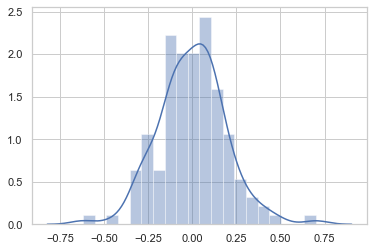

In [842]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

Residual is normally distributed around 0

In [838]:
r2_score(y_train, y_train_pred)

0.8610337144235753

###  Prediction:

In [839]:
scale = MinMaxScaler()
var = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','avgmpg']
X_test[var]=scale.fit_transform(X_test[var])
X_test.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,avgmpg,JP,US,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,0,0,0,0,0.265306,0.341732,0.200000,0.132148,0.082969,0.515873,0.116129,1.000000,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
186,2,0,0,0,0.311953,0.426772,0.315789,0.219125,0.131004,0.515873,0.212903,0.563636,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
59,1,0,0,0,0.355685,0.522835,0.421053,0.271985,0.187773,0.674603,0.206452,0.509091,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
165,1,0,0,0,0.230321,0.379528,0.157895,0.214320,0.082969,0.555556,0.387097,0.454545,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
140,2,0,0,0,0.195335,0.200000,0.136842,0.202307,0.126638,0.857143,0.135484,0.490909,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [840]:
var = X_train.columns
X_test=X_test[var]
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [841]:
r2_score(y_test, y_test_pred)

0.8182074520176378

#### This model looks good and target variables depends on features like enginelocation, car name, horsepower, No of cylinders, car dimension. 